In [1]:
# import Glop linear solver package
from ortools.linear_solver import pywraplp as glp

In [2]:
# input parameters

Warehouse = ['Cincinnati', 'Little Rock', 'Portland']
Region = ['NE', 'NW', 'SE', 'SW']
Capacity = 4000
ShippingCost = [[0.53, 0.21, 0.52, 0.41],
                [0.31, 0.38, 0.41, 0.29],
                [0.56, 0.32, 0.54, 0.33]]
Demand = [2000, 3000, 3500, 5500]
#I assume the shipping cost is per pair of jeans shipped

In [3]:
# initialize LP model object
mymodel = glp.Solver('Clothing Distribution', glp.Solver.GLOP_LINEAR_PROGRAMMING)



In [4]:
# Creating list of variables
dvar = list(range(len(Warehouse)))
for a in range(len(Warehouse)):
    dvar[a] = list(range(len(Region)))
    for b in range(len(Region)):
        dvar[a][b] = mymodel.NumVar(0, mymodel.infinity(), Warehouse[a] + " supplying for " + Region[b])


In [5]:
# define objective function
TotCost = mymodel.Objective()          # create objective function object
TotCost.SetMinimization()              # set direction of optimization
for a in range(len(Warehouse)):
    for b in range(len(Region)):
        TotCost.SetCoefficient(dvar[a][b], ShippingCost[a][b])
        

In [6]:
# define warehouse constraint
ware_constr = list(range(len(Warehouse)))
for i in range(len(Warehouse)):
    ware_constr[i] = mymodel.Constraint(Capacity, Capacity, Warehouse[i])
    for j in range(len(Region)):
        ware_constr[i].SetCoefficient(dvar[i][j], 1)
        

In [7]:
# define Region constraints
reg_constr = list(range(len(Region)))
for j in range(len(Region)):
    reg_constr[j] = mymodel.Constraint(0, Demand[j], Region[j])
    for i in range(len(Warehouse)):
        reg_constr[j].SetCoefficient(dvar[i][j], 1)
        

In [8]:
# Solve the model and print optimal solution
status = mymodel.Solve()
print('Solution Status =', status)
print('Number of variables =', mymodel.NumVariables())
print('Number of constraints =', mymodel.NumConstraints())

print('Optimal Solution:')

# The objective value of the solution.
print('Total Score = %.2f' % TotCost.Value())

Solution Status = 0
Number of variables = 12
Number of constraints = 7
Optimal Solution:
Total Score = 3730.00


In [9]:
# The value of each variable in the solution.
for a in range(len(Region)):
    print (Region[a])
    total = 0
    for b in range(len(Warehouse)): 
        if dvar[b][a].solution_value() != 0:
            print('%s = %.2f units' % (dvar[b][a], dvar[b][a].solution_value()))
            total += dvar[b][a].solution_value()
    print ('=> Region %s receives %.2f units' % (Region[a], total))
        


NE
Little Rock supplying for NE = 2000.00 units
=> Region NE receives 2000.00 units
NW
Cincinnati supplying for NW = 3000.00 units
=> Region NW receives 3000.00 units
SE
Cincinnati supplying for SE = 1000.00 units
Little Rock supplying for SE = 500.00 units
=> Region SE receives 1500.00 units
SW
Little Rock supplying for SW = 1500.00 units
Portland supplying for SW = 4000.00 units
=> Region SW receives 5500.00 units


In [10]:
#Comments:
# All regions meet their demands, 
# except for the SE region, lacking 2000 units


In [11]:
# param analysis LittleRock to SE available (0.2, 0.55)
LR2SE_cost = list(range(20,56))
Opt_value = list()
for p in LR2SE_cost:
    
    #Changing the shipping cost per pair to ship LittleRock to SE
    ShippingCost[1][2] = p/100
    
    # initialize LP model object
    mymodel = glp.Solver('Clothing Distribution', glp.Solver.GLOP_LINEAR_PROGRAMMING)

    # Creating list of variables
    dvar = list(range(len(Warehouse)))
    for a in range(len(Warehouse)):
        dvar[a] = list(range(len(Region)))
        for b in range(len(Region)):
            dvar[a][b] = mymodel.NumVar(0, mymodel.infinity(), Warehouse[a] + " supplying for " + Region[b])  
    
    # define objective function
    TotCost = mymodel.Objective()          # create objective function object
    TotCost.SetMinimization()              # set direction of optimization
    for a in range(len(Warehouse)):
        for b in range(len(Region)):
            TotCost.SetCoefficient(dvar[a][b], ShippingCost[a][b])
       
    # define warehouse constraint
    ware_constr = list(range(len(Warehouse)))
    for i in range(len(Warehouse)):
        ware_constr[i] = mymodel.Constraint(Capacity, Capacity, Warehouse[i])
        for j in range(len(Region)):
            ware_constr[i].SetCoefficient(dvar[i][j], 1)
      
    
    # define Region constraints
    reg_constr = list(range(len(Region)))
    for j in range(len(Region)):
        reg_constr[j] = mymodel.Constraint(0, Demand[j], Region[j])
        for i in range(len(Warehouse)):
            reg_constr[j].SetCoefficient(dvar[i][j], 1)
        
    
    mymodel.Solve()
    Opt_value.append(TotCost.Value())

In [12]:
print(Opt_value)

[3205.0, 3240.0, 3275.0, 3310.0, 3345.0, 3380.0, 3415.0, 3450.0, 3485.0, 3520.0, 3555.0, 3590.0, 3605.0, 3620.0, 3635.0, 3650.0, 3665.0, 3680.0, 3695.0, 3710.0, 3725.0, 3730.0, 3735.0, 3740.0, 3745.0, 3750.0, 3755.0, 3760.0, 3765.0, 3770.0, 3775.0, 3775.0, 3775.0, 3775.0, 3775.0, 3775.0]


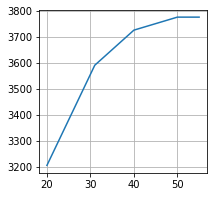

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (3,3))
ax.grid(True)
ax.plot(LR2SE_cost, Opt_value)
plt.show()